In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\hp\Downloads\StudentsPerformance.csv')

In [4]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Descriptive Statistics:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
#Missing value imputation:We will now check for missing values in our dataset. In case there are any missing entries
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

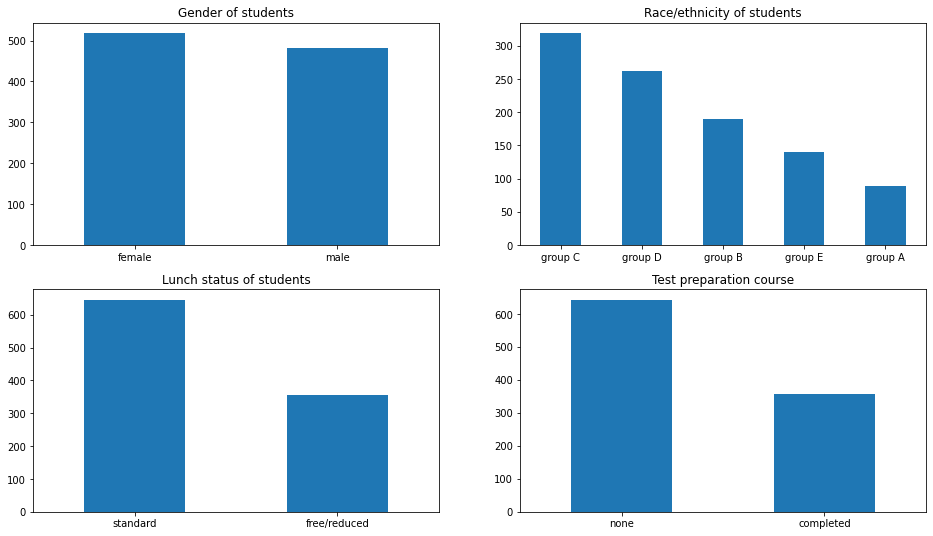

In [7]:
#Graphical representation:We will start with Univariate Analysis. We will be using a bar graph for this purpose
plt.subplot(221)
df['gender'].value_counts().plot(kind='bar',title='Gender of students',figsize=(16,9))
plt.xticks(rotation=0)
plt.subplot(222)
df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/ethnicity of students')
plt.xticks(rotation=0)
plt.subplot(223)
df['lunch'].value_counts().plot(kind='bar', title='Lunch status of students')
plt.xticks(rotation=0)
plt.subplot(224)
df['test preparation course'].value_counts().plot(kind='bar',title='Test preparation course')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

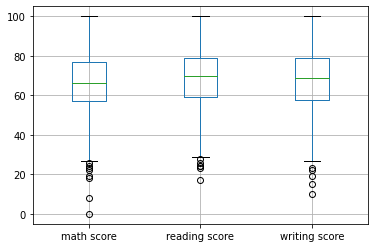

In [8]:
#Continuing with Univariate Analysis, next, we will be making a boxplot of the numerical columns (math score, reading score, and writing score) in the dataset
df.boxplot()

In [ ]:
#1)The middle portion represents the inter-quartile range (IQR)
#2)The horizontal green line in the middle represents the median of the data
#3)The hollow circles near the tails represent outliers in the dataset
#4) However, since it is very much possible for a student to score extremely low marks in a test, we will not remove these outliers


C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

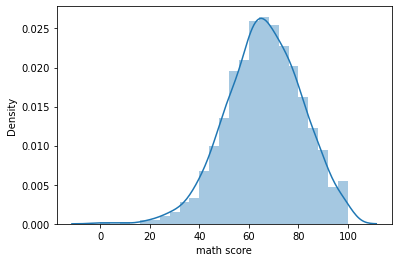

In [11]:
#We will now make a distribution plot of the math score of the students
sns.distplot(df['math score'])

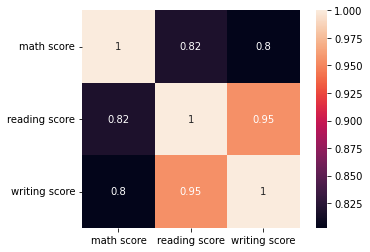

In [13]:
#We will now look at the correlation between the 3 scores with the help of a heatmap. For this, we will use corr() and heatmap() function for this exercise
corr = df.corr()
sns.heatmap(corr,annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

In [ ]:
#The heatmap shows that the 3 scores are highly correlated. Reading score has a correlation coefficient of 0.95 with the writing score. Math score has a correlation coefficient of 0.82 with the reading score, and 0.80 with the writing score

In [ ]:
#We will now move on to Bivariate Analysis. We will look at a relational plot in Seaborn

In [ ]:
# It helps us to understand the relationship between 2 variables on different subsets of the dataset

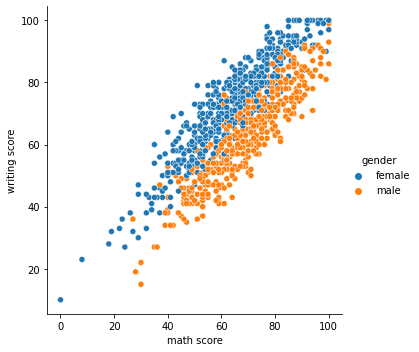

In [14]:
sns.relplot(x='math score', y='writing score', hue='gender', data=df)

In [ ]:
#The graph shows a clear difference in scores between the male and female students. For the same math score, female students are more likely to have a higher writing score than male students. However, for the same writing score, male students are expected to have a higher math score than female students

<AxesSubplot:>

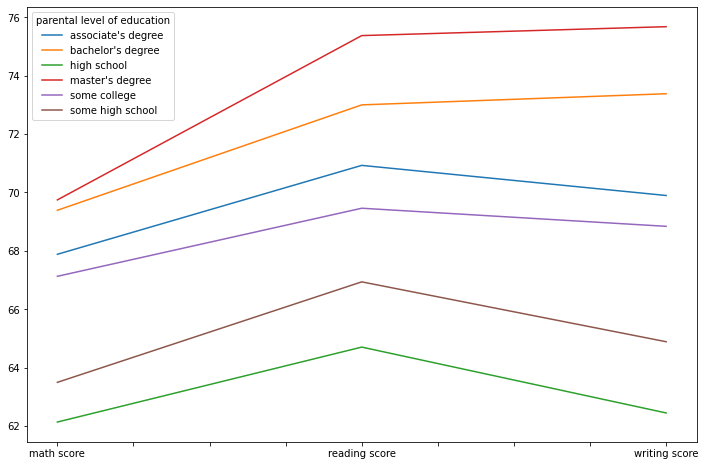

In [16]:
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8))

In [ ]:
#It is very clear from this graph that students whose parents are more educated than others (master’s degree, bachelor’s degree, and associate’s degree) are performing better on average than students whose parents are less educated (high school)

In [ ]:
#let’s look at the impact of the test preparation course on students’ performance using a horizontal bar graph

<AxesSubplot:>

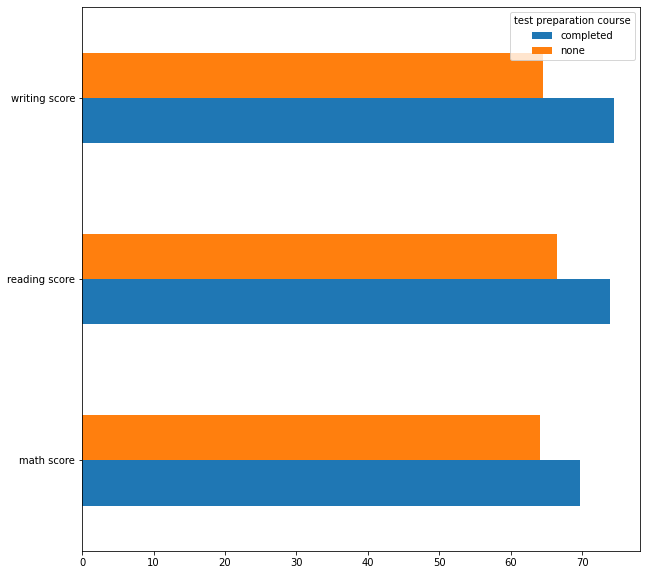

In [20]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh',figsize=(10,10))

In [ ]:
#Again, it is very clear that students who have completed the test preparation course have performed better, on average, as compared to students who have not opted for the course